# 모듈 import

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import time

from tqdm import tqdm

##부모파일에 있는 py파일 읽기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('load_data.py'))))
 
from load_data import load_data_using_multi_process

# 경로지정

## fan-0

In [2]:

obj = 'fan'

In [3]:


##fan_0 전부
fan_path = '/data/time_series/'+obj
fan_files = glob.glob(fan_path + '/*/*/*/*')
print(obj+'_files의 개수 : ', len(fan_files))
print('\n')

##fan_0
fan_0_path = '/data/time_series/'+obj+'/0'
fan_0_files = glob.glob(fan_0_path + '/*/*/*')
print(obj+' 0의 files 개수 : ', len(fan_0_files))
print('\n')

##fan__6
fan__6_path = '/data/time_series/'+obj+'/_6'
fan__6_files = glob.glob(fan__6_path + '/*/*/*')
print(obj+' _6의 files 개수 : ', len(fan__6_files))
print('\n')

##fan_6
fan_6_path = '/data/time_series/'+obj+'/6'
fan_6_files = glob.glob(fan_6_path + '/*/*/*')
print(obj+' 6의 files 개수 : ', len(fan_6_files))
print('\n')

fan_files의 개수 :  16650


fan 0의 files 개수 :  5550


fan _6의 files 개수 :  5550


fan 6의 files 개수 :  5550




In [4]:
fan_0_files[0], fan__6_files[0], fan_6_files[0]

('/data/time_series/fan/0/id_04/normal/00000226.wav',
 '/data/time_series/fan/_6/id_04/normal/00000226.wav',
 '/data/time_series/fan/6/id_04/normal/00000226.wav')

# 데이터로드

In [49]:
sr = 16000
target_sr = 160

fan = load_data_using_multi_process(files = fan_files, sr = sr, target_sr = target_sr)



아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 25.806849002838135 ---


In [50]:
fan_0 = load_data_using_multi_process(files = fan_0_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 11.089985370635986 ---


In [51]:
fan__6 = load_data_using_multi_process(files = fan__6_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 11.100532531738281 ---


In [52]:
fan_6 = load_data_using_multi_process(files = fan_6_files, sr = sr, target_sr = target_sr)


아래 리스트에서 샘플링 기법을 선택해주세요. 
 ['abs_max(our_custom)', 'kaiser_best', 'kaiser_fast', 'fft', 'scipy', 'polyphase', 'linear', 'zero_order_hold', 'sinc_best', 'sinc_medium', 'sinc_fastest', 'soxr_vhq', 'soxr_hq', 'soxr_mq', 'soxr_lq', 'soxr_hq', 'soxr_qq']
선택한 기법: kaiser_best

멀티 프로세싱을 시작합니다. 현재 코어 30개 사용 중. 
1.다른 사람과 동시에 돌리지 마세요.
2.함부로 진행중에 중단 하지마세요.
--- 걸린시간: 11.152470350265503 ---


# 분석

## 비정상 → 정상

In [9]:

def vis_plot_abnonor(objec:str, model:str, every, part):
    aa = every
    bb = part

    fig = plt.figure(figsize=(15,10))

    X = range(len(fan_0[0][0][:-1]))

    ###fan_0 전체 그리기###
    all_mu_li = []
    for a in aa:
        all_mu = np.mean(a[0][:-1])
        all_mu_li.append(all_mu)
        plt.plot(X, a[0][:-1], color='black', alpha=0.1)

    real_all_mu = np.mean(all_mu_li)

    ###fan_0위에 fan_0_id00_ 그리기###

    nor_mu_li = []
    abnor_mu_li = []
    
    for b in bb :
        if b[0][-1] == 1: #abnormal
            abnor_mu = np.mean(b[0][:-1])
            abnor_mu_li.append(abnor_mu)
            plt.plot(X, b[0][:-1], color='aqua', alpha=0.1)    

    for b in bb:
        if b[0][-1] == 0: #normal
            nor_mu = np.mean(b[0][:-1])
            nor_mu_li.append(nor_mu)
            plt.plot(X, b[0][:-1], color='yellow', alpha=0.1)

    real_nor_mu = np.mean(nor_mu_li)
    real_abnor_mu = np.mean(abnor_mu_li)

    plt.plot([0,1600], [real_all_mu,real_all_mu], color='black', label='All-black')
    plt.plot([0,1600],[real_nor_mu,real_nor_mu], color='yellow', label='normal-yellow')
    plt.plot([0,1600],[real_abnor_mu,real_abnor_mu], color='aqua', label='abnormal-aqua')

    ##축 설정##
    plt.ylim(-0.03, 0.03)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=10)
    plt.legend(loc='best')
    plt.title('All {} above {}-{}'.format(objec, objec, model), fontsize=20)

In [10]:
obj, model

('fan', '0')

### model-0

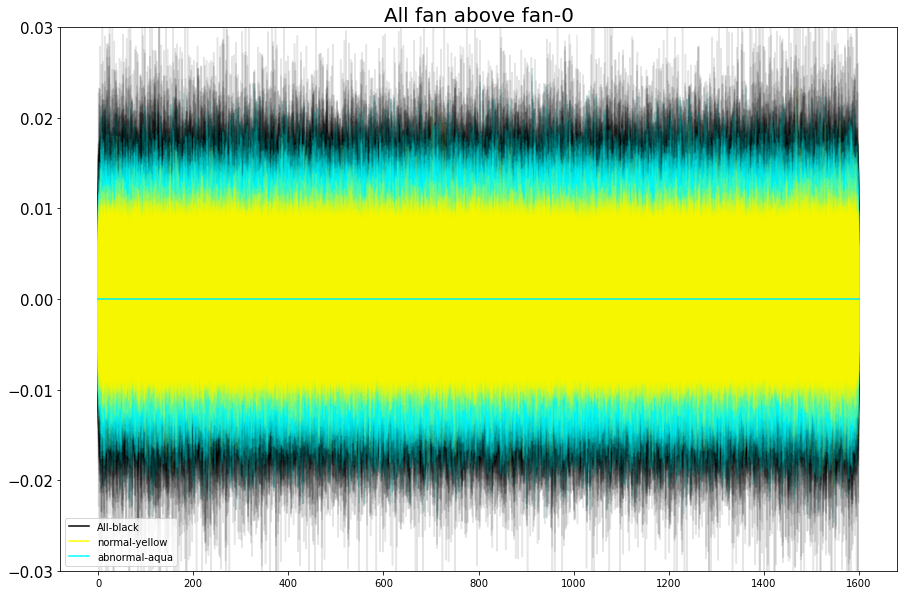

In [11]:
## 새로한거 해보기
vis_plot_abnonor(obj, '0', fan, fan_0)

해결요망

### model-_6

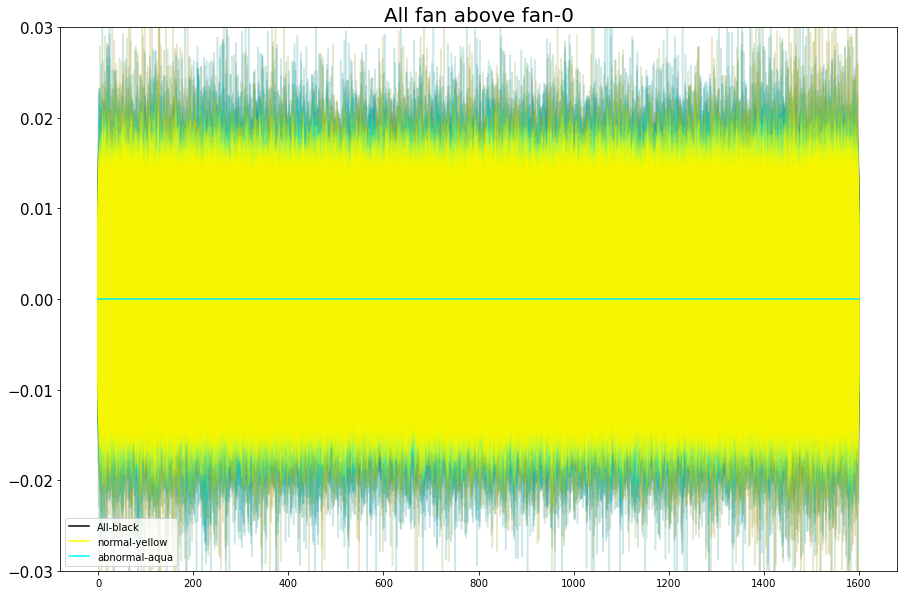

In [12]:
vis_plot_abnonor(obj, '_6', fan, fan__6)

### model-6

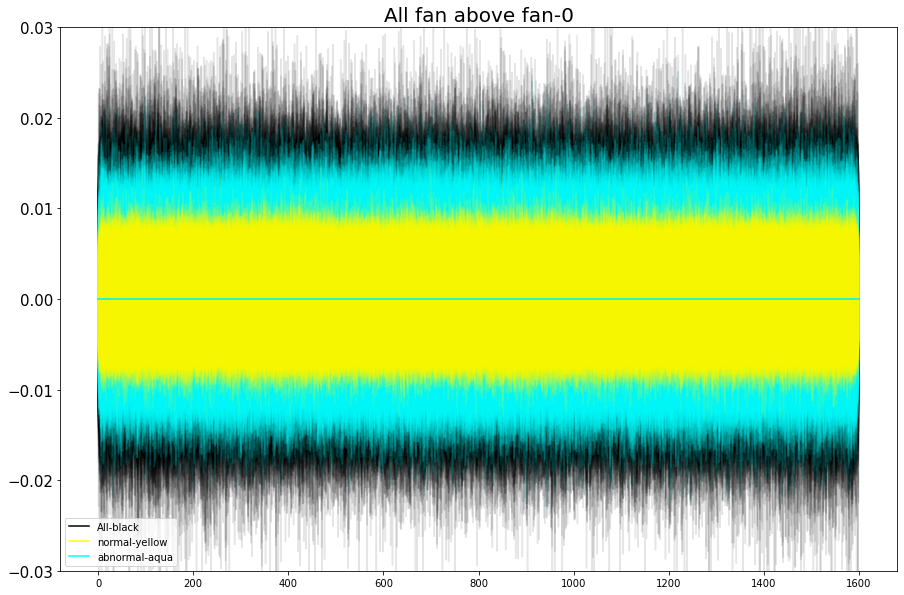

In [13]:
vis_plot_abnonor(obj, '6', fan, fan_6)

## 정상 → 비정상

In [53]:

def vis_plot_noabnor(objec:str, model:str, every, part):
    aa = every
    bb = part

    fig = plt.figure(figsize=(15,10))

    X = range(len(fan_0[0][0][:-1]))

    ###fan_0 전체 그리기###
    all_mu_li = []
    for a in aa:
        all_mu = np.mean(a[0][:-1])
        all_mu_li.append(all_mu)
        plt.plot(X, a[0][:-1], color='black', alpha=0.2)

    real_all_mu = np.mean(all_mu_li)

    ###fan_0위에 fan_0_id00_ 그리기###

    nor_mu_li = []
    abnor_mu_li = []

    for b in bb:
        if b[0][-1] == 0: #normal
            nor_mu = np.mean(b[0][:-1])
            nor_mu_li.append(nor_mu)
            plt.plot(X, b[0][:-1], color='yellow', alpha=0.2)
    for b in bb :
        if b[0][-1] == 1: #abnormal
            abnor_mu = np.mean(b[0][:-1])
            abnor_mu_li.append(abnor_mu)
            plt.plot(X, b[0][:-1], color='aqua', alpha=0.2)


    real_nor_mu = np.mean(nor_mu_li)
    real_abnor_mu = np.mean(abnor_mu_li)

    plt.plot([0,1600], [real_all_mu,real_all_mu], color='black', label='All-black')
    plt.plot([0,1600],[real_nor_mu,real_nor_mu], color='yellow', label='normal-yellow')
    plt.plot([0,1600],[real_abnor_mu,real_abnor_mu], color='aqua', label='abnormal-aqua')

    ##축 설정##
    plt.ylim(-0.03, 0.03)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=10)
    plt.legend(loc='best')
    plt.title('All {} above {}-{}'.format(objec,objec, model), fontsize=20)

In [57]:
obj

'pump'

### 정상 → 비정상 : 모델0

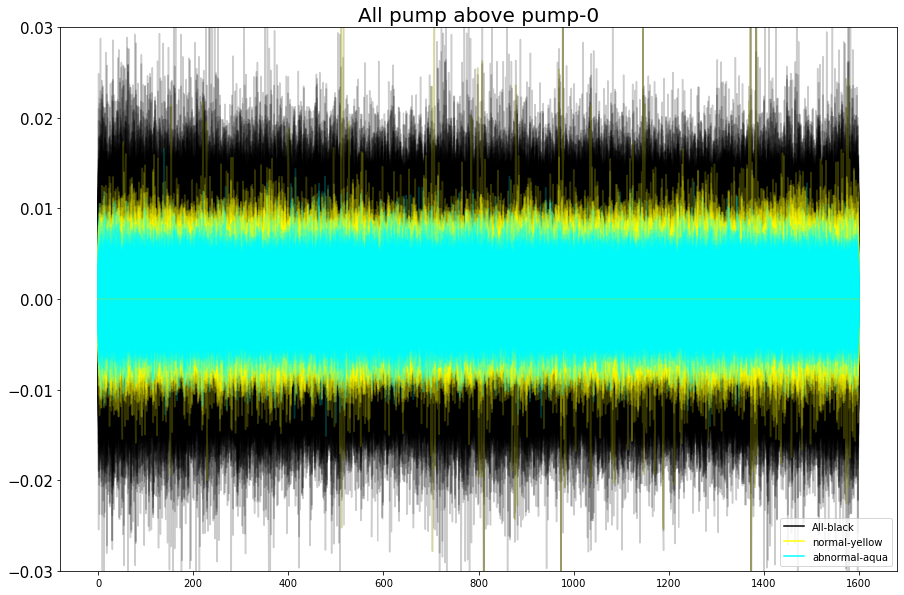

In [56]:
vis_plot_noabnor(obj, '0', fan, fan_0)

### 정상 → 비정상 : 모델_6

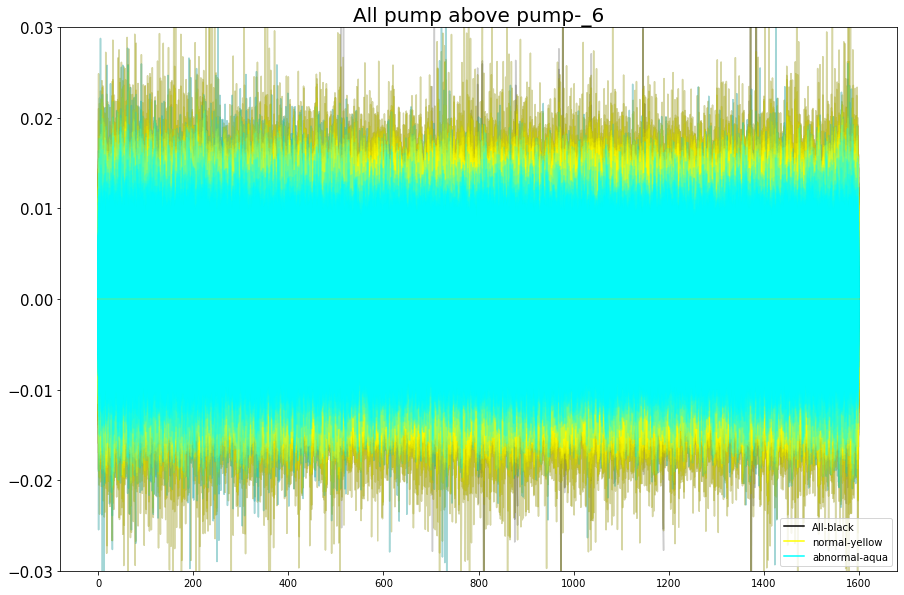

In [58]:
vis_plot_noabnor(obj, '_6', fan, fan__6)

### 정상 → 비정상 : 모델6

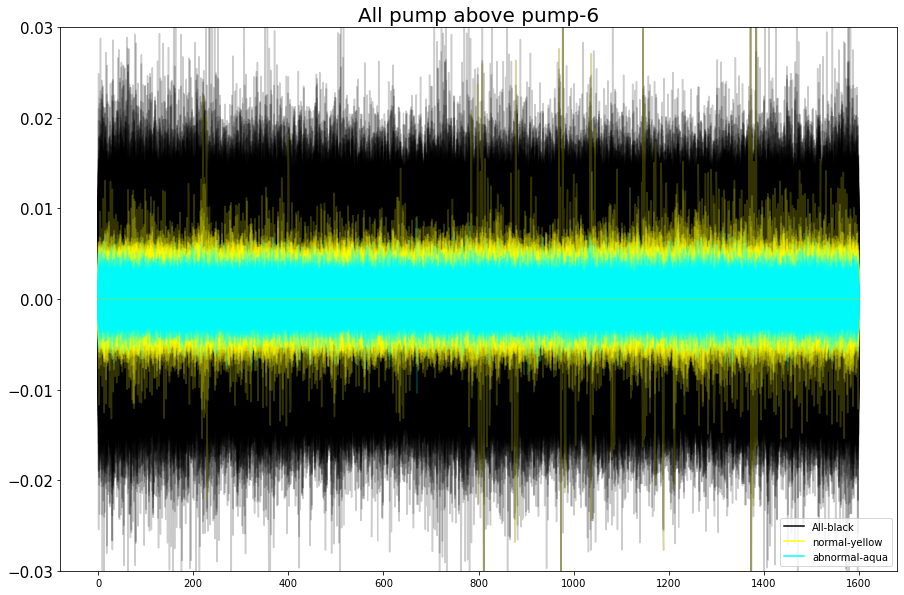

In [59]:
vis_plot_noabnor(obj, '6', fan, fan_6)